In [14]:
import pandas as pd
from sqlalchemy import create_engine

# Define your PostgreSQL connection parameters
db_username = 'ranyasharma'
db_password = 'encdns'
db_host = 'localhost'
db_port = '5432'
db_name = 'encrypteddns'

# Create the database engine
engine = create_engine(f'postgresql://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}')

# Define your SQL query
query = """
SELECT *
FROM poah_oct
WHERE tool = 'encrypteddns';
"""

# Execute the query and load the data into a DataFrame
df = pd.read_sql(query, engine)

# Display the first few rows of the DataFrame
df.head()


,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,anonipaddr,ipaddrchanged,error,errormsg
0,2023-10-11 20:04:23,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,1dot1dot1dot1.cloudflare-dns.com_amazon,None,dig,60637,uchicago,7.0,floto-uchicago,128.135.204.0,False,False,None
1,2023-10-11 20:04:23,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,1dot1dot1dot1.cloudflare-dns.com_google,None,dig,60637,uchicago,7.0,floto-uchicago,128.135.204.0,False,False,None
2,2023-10-11 20:04:23,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,1dot1dot1dot1.cloudflare-dns.com_wikipedia,None,dig,60637,uchicago,7.0,floto-uchicago,128.135.204.0,False,False,None
3,2023-10-11 20:04:23,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,adblock.doh.mullvad.net_amazon,None,dig,60637,uchicago,39.0,floto-uchicago,128.135.204.0,False,False,None
4,2023-10-11 20:04:23,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,adblock.doh.mullvad.net_google,None,dig,60637,uchicago,35.0,floto-uchicago,128.135.204.0,False,False,None


In [52]:
df.size

281523

In [15]:
r = pd.read_json('resolver_geolocation.json')
r.rename(columns = {'resolver':'target'}, inplace = True)
ip_europe = r[(r['country_name']=='France') | (r['country_name']=='Austria') | (r['country_name']=='Russia') | (r['country_name']=='Netherlands') | (r['country_name']=='Spain') | (r['country_name']=='Luxembourg') | (r['country_name']=='Czechia')  | (r['country_name']=='Switzerland')  | (r['country_name']=='United Kingdom')  | (r['country_name']=='Finland')  | (r['country_name']=='Germany')  | (r['country_name']=='Sweden')  | (r['country_name']=='Denmark')]
ip_asia = r[(r['country_name']=='Cyprus') | (r['country_name']=='India') | (r['country_name']=='China') | (r['country_name']=='Japan') | (r['country_name']=='Singapore')  | (r['country_name']=='Indonesia') | (r['country_name']=='Hong Kong')| (r['country_name']=='Taiwan')]
ip_north_america = r[(r['country_name']=='United States') | (r['country_name']=='Canada') ]
ip_australia = r[(r['country_name']=='Australia')]
ip_not_found = r[(r['IP_address'] == 'None')]
#Switch Cloudflare from Aus to NA
ip_australia = ip_australia.drop(labels=41, axis=0)

r.head()

,target,IP_address,country_iso_code,country_name,city_name
0,https://adblock.doh.mullvad.net/dns-query,194.242.2.3,US,United States,New York
1,https://anycast.dns.nextdns.io/dns-query,45.90.30.0,US,United States,None
2,https://anycast.uncensoreddns.org/dns-query,91.239.100.100,DK,Denmark,None
3,https://chewbacca.meganerd.nl/dns-query,136.244.97.114,NL,Netherlands,Amsterdam
4,https://dns-doh-no-safe-search.dnsforfamily.co...,167.235.236.107,DE,Germany,Munich


In [16]:
ip_europe['target'].unique()

array(['https://anycast.uncensoreddns.org/dns-query',
       'https://chewbacca.meganerd.nl/dns-query',
       'https://dns-doh-no-safe-search.dnsforfamily.com/dns-query',
       'https://dns-doh.dnsforfamily.com/dns-query',
       'https://dns.brahma.world/dns-query',
       'https://dns.circl.lu/dns-query',
       'https://dns.digitale-gesellschaft.ch/dns-query',
       'https://dns.digitalsize.net/dns-query',
       'https://dns.njal.la/dns-query', 'https://dns.switch.ch/dns-query',
       'https://dns1.ryan-palmer.com/dns-query',
       'https://dns10.quad9.net/dns-query',
       'https://dns11.quad9.net/dns-query',
       'https://dns12.quad9.net/dns-query',
       'https://dnsforge.de/dns-query',
       'https://dnsse-noads.alekberg.net/dns-query',
       'https://dnsse.alekberg.net/dns-query',
       'https://doh.dnscrypt.uk/dns-query',
       'https://doh.ffmuc.net/dns-query',
       'https://doh.libredns.gr/dns-query',
       'https://doh.nl.ahadns.net/dns-query',
       'http

In [17]:
df.target.unique()

array(['1dot1dot1dot1.cloudflare-dns.com_amazon',
       '1dot1dot1dot1.cloudflare-dns.com_google',
       '1dot1dot1dot1.cloudflare-dns.com_wikipedia',
       'adblock.doh.mullvad.net_amazon', 'adblock.doh.mullvad.net_google',
       'adblock.doh.mullvad.net_wikipedia', 'adl.adfilter.net_amazon',
       'adl.adfilter.net_google', 'adl.adfilter.net_wikipedia',
       'antivirus.bebasid.com_amazon', 'antivirus.bebasid.com_google',
       'antivirus.bebasid.com_wikipedia', 'anycast.dns.nextdns.io_amazon',
       'anycast.dns.nextdns.io_google',
       'anycast.dns.nextdns.io_wikipedia',
       'anycast.uncensoreddns.org_amazon',
       'anycast.uncensoreddns.org_google',
       'anycast.uncensoreddns.org_wikipedia',
       'dns-doh-no-safe-search.dnsforfamily.com_amazon',
       'dns.quad9.net_amazon',
       'dns-doh-no-safe-search.dnsforfamily.com_google',
       'dns-doh-no-safe-search.dnsforfamily.com_wikipedia',
       'dns-doh.dnsforfamily.com_amazon',
       'dns-doh.dnsforfamily.

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Flag rows based on "encrypted_dns_latency" and handle NaN by assuming False (i.e., no latency)
df['Has_Latency'] = df['target'].str.contains("encrypted_dns_latency").fillna(False).astype(int)

# Adjust resolver extraction to handle your data specifically
df['resolver'] = df.apply(lambda x: x['target'].split('_')[0] if pd.notnull(x['target']) and x['Has_Latency'] == 0 else x['target'].split('_')[0] if pd.notnull(x['target']) else None, axis=1)

# Proceed with your plotting steps...
# Note: Ensure df is not empty and contains the expected data after these operations.


In [19]:
df

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,anonipaddr,ipaddrchanged,error,errormsg,Has_Latency,resolver
0,2023-10-11 20:04:23,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,1dot1dot1dot1.cloudflare-dns.com_amazon,None,dig,60637,uchicago,7.0,floto-uchicago,128.135.204.0,False,False,None,0,1dot1dot1dot1.cloudflare-dns.com
1,2023-10-11 20:04:23,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,1dot1dot1dot1.cloudflare-dns.com_google,None,dig,60637,uchicago,7.0,floto-uchicago,128.135.204.0,False,False,None,0,1dot1dot1dot1.cloudflare-dns.com
2,2023-10-11 20:04:23,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,1dot1dot1dot1.cloudflare-dns.com_wikipedia,None,dig,60637,uchicago,7.0,floto-uchicago,128.135.204.0,False,False,None,0,1dot1dot1dot1.cloudflare-dns.com
3,2023-10-11 20:04:23,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,adblock.doh.mullvad.net_amazon,None,dig,60637,uchicago,39.0,floto-uchicago,128.135.204.0,False,False,None,0,adblock.doh.mullvad.net
4,2023-10-11 20:04:23,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,adblock.doh.mullvad.net_google,None,dig,60637,uchicago,35.0,floto-uchicago,128.135.204.0,False,False,None,0,adblock.doh.mullvad.net
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,2023-10-12 20:04:21,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,unicast.uncensoreddns.org_google,None,dig,60637,uchicago,107.0,floto-uchicago,128.135.204.0,False,False,None,0,unicast.uncensoreddns.org
14813,2023-10-12 20:04:21,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,unicast.uncensoreddns.org_wikipedia,None,dig,60637,uchicago,99.0,floto-uchicago,128.135.204.0,False,False,None,0,unicast.uncensoreddns.org
14814,2023-10-12 20:04:21,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,v.dnscrypt.uk_amazon,None,dig,60637,uchicago,95.0,floto-uchicago,128.135.204.0,False,False,None,0,v.dnscrypt.uk
14815,2023-10-12 20:04:21,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,v.dnscrypt.uk_google,None,dig,60637,uchicago,95.0,floto-uchicago,128.135.204.0,False,False,None,0,v.dnscrypt.uk


In [20]:
resolver_urls = ip_europe['target'].unique()

# Extract domain names as identifiers
resolver_identifiers = [url.split('//')[1].split('/')[0] for url in resolver_urls]

# This assumes 'df' is your main DataFrame
# Create a column to indicate if a row matches any of the specified resolvers
df['Matches_Specified_Resolver'] = df['target'].apply(lambda x: any(resolver_identifier in x for resolver_identifier in resolver_identifiers))

# Filter the DataFrame to keep only the rows for specified resolvers
df_filtered = df[df['Matches_Specified_Resolver']]


In [21]:
df_filtered

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,anonipaddr,ipaddrchanged,error,errormsg,Has_Latency,resolver,Matches_Specified_Resolver
15,2023-10-11 20:04:23,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,anycast.uncensoreddns.org_amazon,None,dig,60637,uchicago,123.0,floto-uchicago,128.135.204.0,False,False,None,0,anycast.uncensoreddns.org,True
16,2023-10-11 20:04:23,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,anycast.uncensoreddns.org_google,None,dig,60637,uchicago,119.0,floto-uchicago,128.135.204.0,False,False,None,0,anycast.uncensoreddns.org,True
17,2023-10-11 20:04:23,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,anycast.uncensoreddns.org_wikipedia,None,dig,60637,uchicago,119.0,floto-uchicago,128.135.204.0,False,False,None,0,anycast.uncensoreddns.org,True
18,2023-10-11 20:04:23,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,anycast.uncensoreddns.org_wikipedia,None,dig,60637,uchicago,NaN,floto-uchicago,128.135.204.0,False,True,/usr/local/src/nm-exp-active-netrics/bin/dig: ...,0,anycast.uncensoreddns.org,True
19,2023-10-11 20:04:23,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,anycast.uncensoreddns.org_wikipedia,None,dig,60637,uchicago,NaN,floto-uchicago,128.135.204.0,False,True,/usr/local/src/nm-exp-active-netrics/bin/dig: ...,0,anycast.uncensoreddns.org,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,2023-10-12 20:04:21,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,unicast.uncensoreddns.org_google,None,dig,60637,uchicago,107.0,floto-uchicago,128.135.204.0,False,False,None,0,unicast.uncensoreddns.org,True
14813,2023-10-12 20:04:21,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,unicast.uncensoreddns.org_wikipedia,None,dig,60637,uchicago,99.0,floto-uchicago,128.135.204.0,False,False,None,0,unicast.uncensoreddns.org,True
14814,2023-10-12 20:04:21,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,v.dnscrypt.uk_amazon,None,dig,60637,uchicago,95.0,floto-uchicago,128.135.204.0,False,False,None,0,v.dnscrypt.uk,True
14815,2023-10-12 20:04:21,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,v.dnscrypt.uk_google,None,dig,60637,uchicago,95.0,floto-uchicago,128.135.204.0,False,False,None,0,v.dnscrypt.uk,True


In [22]:
# Compute median latencies for each resolver and latency type
medians = df_filtered.groupby(['resolver', 'Has_Latency'])['value'].median().reset_index()

# Sort the resolvers by combined median latency (irrespective of latency type)
combined_medians = medians.groupby('resolver')['value'].median().sort_values().reset_index()

# Get the sorted order of resolvers
sorted_resolvers = combined_medians['resolver'].tolist()


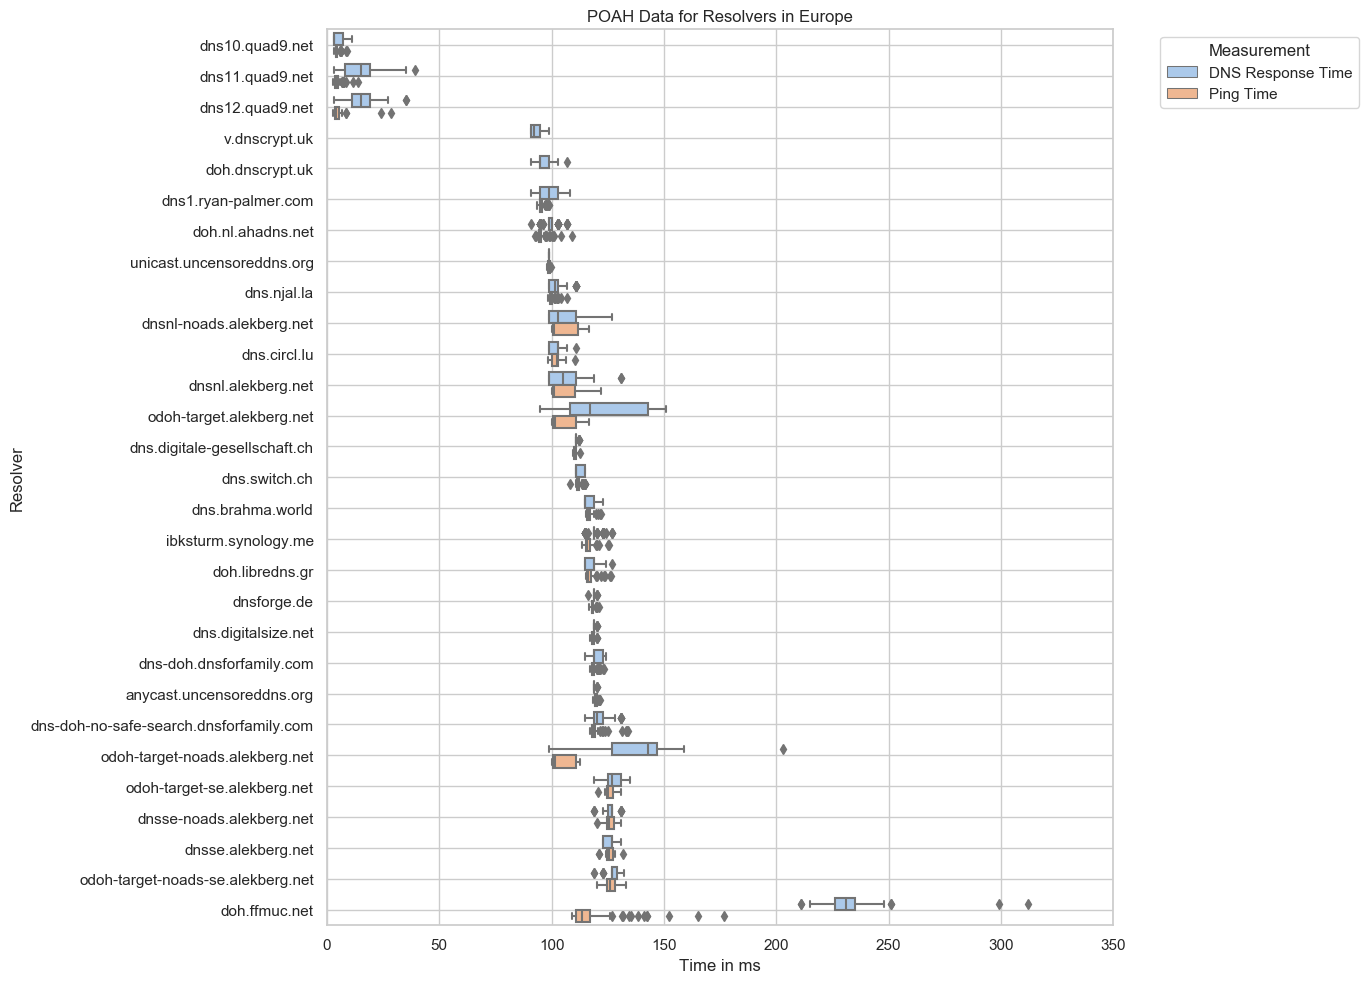

In [27]:
import numpy as np

# Calculate the IQR for each group
Q1 = df_filtered.groupby('resolver')['value'].quantile(0.25)
Q3 = df_filtered.groupby('resolver')['value'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for each group
upper_bound = Q3 + 2.5 * IQR
lower_bound = Q1 - 2.5 * IQR

# Filter data
def filter_outliers(row):
    resolver = row['resolver']
    return lower_bound[resolver] <= row['value'] <= upper_bound[resolver]

df_filtered = df_filtered[df_filtered.apply(filter_outliers, axis=1)]


sns.set(style="whitegrid")  # Set the style for the plots

plt.figure(figsize=(14, 10), dpi=100)  # Increase the figure size and DPI for better resolution

# Create the boxplot, applying the sorted order of resolvers
ax = sns.boxplot(
    data=df_filtered,
    x='value',
    y='resolver',
    hue='Has_Latency',
    order=sorted_resolvers,  # Apply the sorted order here
    palette="pastel",
    dodge=True
)
plt.setp(ax.get_yticklabels(), rotation=0)
ax.set_xlim(0, 350)  # Adjust the range according to your data
ax.yaxis.grid(True)

palette = "pastel"


# Set axis labels and title
ax.set_xlabel('Time in ms')
ax.set_ylabel('Resolver')
ax.set_title('POAH Data for Resolvers in Europe')

# Rotate Y-axis labels for better readability if necessary
plt.setp(ax.get_yticklabels(), rotation=0)

# Place the legend outside the plot
# Retrieve the handles and labels from the existing legend
handles, labels = ax.get_legend_handles_labels()

# Define custom labels
custom_labels = ['DNS Response Time', 'Ping Time']

# Create a new legend with custom labels
ax.legend(handles=handles, title='Measurement', labels=custom_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust the layout

# Save the plot with a higher resolution
##plt.savefig('/mnt/data/sorted_boxplot.png', format='png', dpi=300)

plt.show()  # Show the plot


In [28]:
ip_north_america['target'].unique()

array(['https://adblock.doh.mullvad.net/dns-query',
       'https://anycast.dns.nextdns.io/dns-query',
       'https://dns.google/dns-query', 'https://dns.quad9.net/dns-query',
       'https://dns9.quad9.net/dns-query',
       'https://doh.la.ahadns.net/dns-query',
       'https://doh.mullvad.net/dns-query',
       'https://doh.safesurfer.io/dns-query',
       'https://dohtrial.att.net/dns-query',
       'https://freedns.controld.com/dns-query',
       'https://kronos.plan9-dns.com/dns-query',
       'https://ordns.he.net/dns-query',
       'https://pluton.plan9-dns.com/dns-query'], dtype=object)

In [33]:
r = pd.read_json('resolver_geolocation.json')
ip_europe = r[(r['country_name']=='France') | (r['country_name']=='Austria') | (r['country_name']=='Russia') | (r['country_name']=='Netherlands') | (r['country_name']=='Spain') | (r['country_name']=='Luxembourg') | (r['country_name']=='Czechia')  | (r['country_name']=='Switzerland')  | (r['country_name']=='United Kingdom')  | (r['country_name']=='Finland')  | (r['country_name']=='Germany')  | (r['country_name']=='Sweden')  | (r['country_name']=='Denmark')]
ip_asia = r[(r['country_name']=='Cyprus') | (r['country_name']=='India') | (r['country_name']=='China') | (r['country_name']=='Japan') | (r['country_name']=='Singapore')  | (r['country_name']=='Indonesia') | (r['country_name']=='Hong Kong')| (r['country_name']=='Taiwan')]
ip_north_america = r[(r['country_name']=='United States') | (r['country_name']=='Canada') ]
ip_australia = r[(r['country_name']=='Australia')]
ip_not_found = r[(r['IP_address'] == 'None')]
display(r)

,resolver,IP_address,country_iso_code,country_name,city_name
0,https://adblock.doh.mullvad.net/dns-query,194.242.2.3,US,United States,New York
1,https://anycast.dns.nextdns.io/dns-query,45.90.30.0,US,United States,None
2,https://anycast.uncensoreddns.org/dns-query,91.239.100.100,DK,Denmark,None
3,https://chewbacca.meganerd.nl/dns-query,136.244.97.114,NL,Netherlands,Amsterdam
4,https://dns-doh-no-safe-search.dnsforfamily.co...,167.235.236.107,DE,Germany,Munich
...,...,...,...,...,...
56,https://dnsnl-noads.alekberg.net/dns-query,51.15.124.208,FR,France,None
57,https://dnsnl.alekberg.net/dns-query,51.15.124.208,FR,France,None
58,https://odoh-target-noads.alekberg.net/dns-query,89.38.131.38,NL,Netherlands,Dronten
59,https://odoh-target.alekberg.net/dns-query,89.38.131.38,NL,Netherlands,Dronten


In [34]:
google = {'resolver':'https://dns.google/dns-query','IP_address':'8.8.8.8','country_iso_code':'US','country_name': 'United States', 'city_name':'None'}

cloudflare1 = {'resolver':'https://dns.cloudflare.com/dns-query','IP_address':'1.0.0.1','country_iso_code':'US','country_name': 'United States', 'city_name':'None'}
cloudflare2 = {'resolver':'https://family.cloudflare-dns.com/dns-query','IP_address':'1.0.0.3','country_iso_code':'US', 'country_name': 'United States', 'city_name':'None'}
cloudflare3 = {'resolver':'https://security.cloudflare-dns.com/dns-query','IP_address':'1.0.0.2','country_iso_code':'US', 'country_name': 'United States', 'city_name':'None'}

quad9_1 = {'resolver':'https://dns9.quad9.net/dns-query','IP_address':'9.9.9.9','country_iso_code':'US','country_name': 'United States', 'city_name':'Berkeley'}
quad9_2 = {'resolver':'https://dns9.quad9.net/dns-query','IP_address':'9.9.9.10','country_iso_code':'US','country_name': 'United States', 'city_name':'None'}

ordns = {'resolver':'https://ordns.he.net/dns-query','IP_address':'74.82.42.42','country_iso_code':'US','country_name': 'United States', 'city_name':'None'}

ip_north_america = ip_north_america.append(cloudflare1, ignore_index = True)
ip_north_america = ip_north_america.append(cloudflare2, ignore_index = True)
ip_north_america = ip_north_america.append(cloudflare3, ignore_index = True)

ip_asia = ip_asia.append(cloudflare1, ignore_index = True)
ip_asia = ip_asia.append(cloudflare2, ignore_index = True)
ip_asia = ip_asia.append(cloudflare3, ignore_index = True)

ip_europe = ip_europe.append(cloudflare1, ignore_index = True)
ip_europe = ip_europe.append(cloudflare2, ignore_index = True)
ip_europe = ip_europe.append(cloudflare3, ignore_index = True)

ip_europe = ip_europe.append(google, ignore_index = True)
ip_asia = ip_asia.append(google, ignore_index = True)

ip_asia = ip_asia.append(quad9_1, ignore_index = True)
ip_asia = ip_asia.append(quad9_2, ignore_index = True)

ip_europe = ip_europe.append(quad9_1, ignore_index = True)
ip_europe = ip_europe.append(quad9_2, ignore_index = True)

ip_europe = ip_europe.append(ordns, ignore_index = True)
ip_asia = ip_asia.append(ordns, ignore_index = True)

In [35]:
ip_north_america

,resolver,IP_address,country_iso_code,country_name,city_name
0,https://adblock.doh.mullvad.net/dns-query,194.242.2.3,US,United States,New York
1,https://anycast.dns.nextdns.io/dns-query,45.90.30.0,US,United States,None
2,https://dns.google/dns-query,8.8.8.8,US,United States,None
3,https://dns.quad9.net/dns-query,9.9.9.9,US,United States,Berkeley
4,https://dns9.quad9.net/dns-query,9.9.9.9,US,United States,Berkeley
5,https://doh.la.ahadns.net/dns-query,45.67.219.208,US,United States,Los Angeles
6,https://doh.mullvad.net/dns-query,194.242.2.2,US,United States,New York
7,https://doh.safesurfer.io/dns-query,35.227.226.142,US,United States,Kansas City
8,https://dohtrial.att.net/dns-query,13.89.120.251,US,United States,Des Moines
9,https://freedns.controld.com/dns-query,76.76.2.11,CA,Canada,None


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Flag rows based on "encrypted_dns_latency" and handle NaN by assuming False (i.e., no latency)
df['Has_Latency'] = df['target'].str.contains("encrypted_dns_latency").fillna(False).astype(int)

# Adjust resolver extraction to handle your data specifically
df['resolver'] = df.apply(lambda x: x['target'].split('_')[0] if pd.notnull(x['target']) and x['Has_Latency'] == 0 else x['target'].split('_')[0] if pd.notnull(x['target']) else None, axis=1)

# Proceed with your plotting steps...
# Note: Ensure df is not empty and contains the expected data after these operations.


In [38]:
resolver_urls = ip_north_america['resolver'].unique()

# Extract domain names as identifiers
resolver_identifiers = [url.split('//')[1].split('/')[0] for url in resolver_urls]

# This assumes 'df' is your main DataFrame
# Create a column to indicate if a row matches any of the specified resolvers
df['Matches_Specified_Resolver'] = df['target'].apply(lambda x: any(resolver_identifier in x for resolver_identifier in resolver_identifiers))

# Filter the DataFrame to keep only the rows for specified resolvers
df_filtered = df[df['Matches_Specified_Resolver']]


In [39]:
# Compute median latencies for each resolver and latency type
medians = df_filtered.groupby(['resolver', 'Has_Latency'])['value'].median().reset_index()

# Sort the resolvers by combined median latency (irrespective of latency type)
combined_medians = medians.groupby('resolver')['value'].median().sort_values().reset_index()

# Get the sorted order of resolvers
sorted_resolvers = combined_medians['resolver'].tolist()


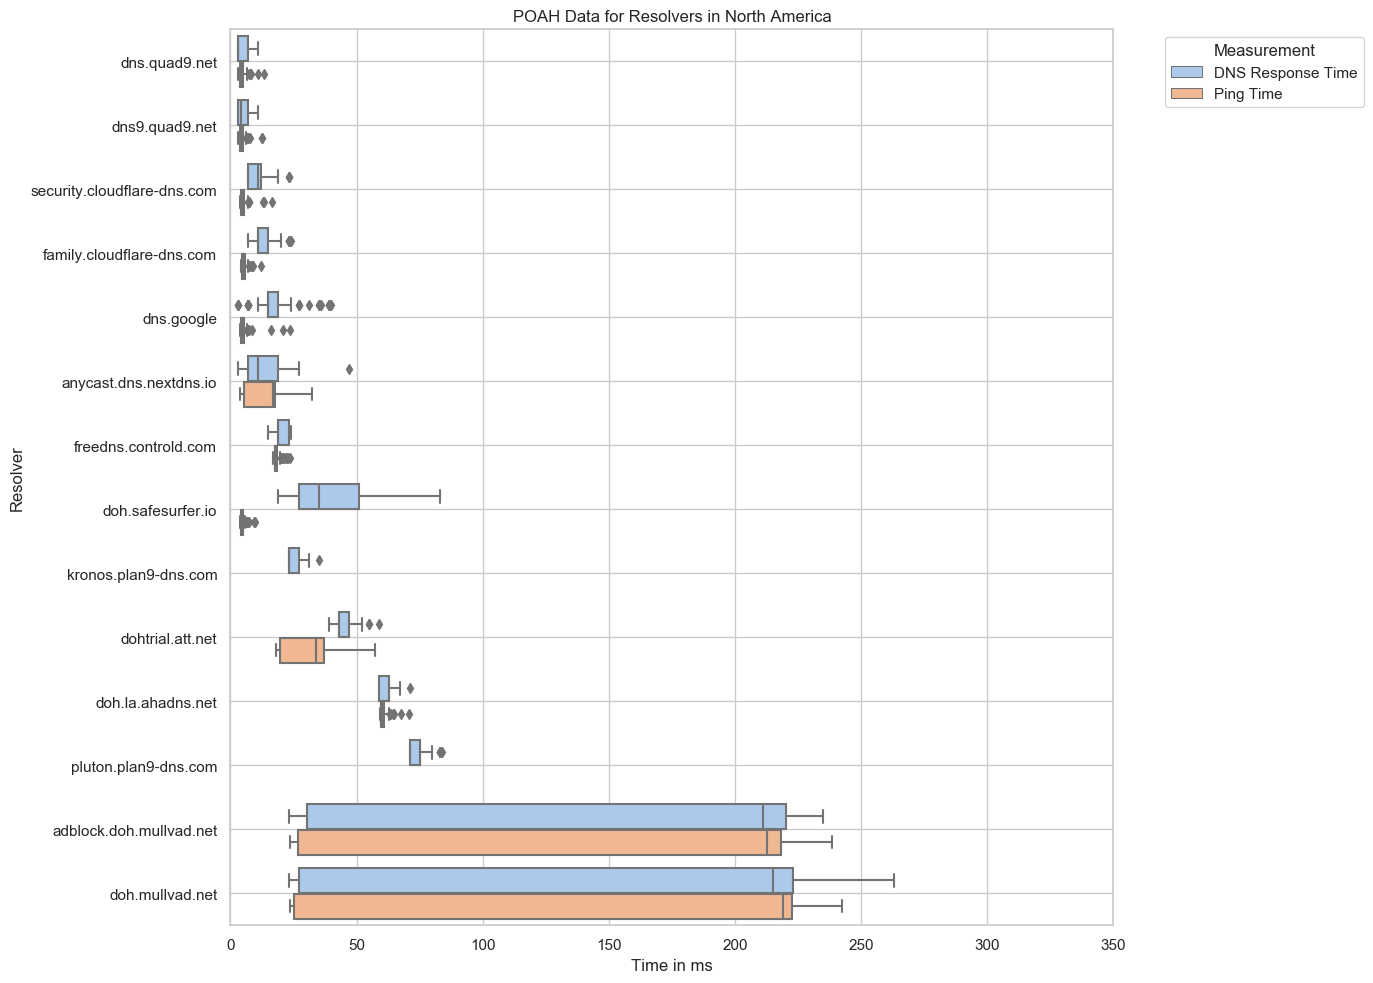

In [43]:
import numpy as np

# Calculate the IQR for each group
Q1 = df_filtered.groupby('resolver')['value'].quantile(0.25)
Q3 = df_filtered.groupby('resolver')['value'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for each group
upper_bound = Q3 + 2.5 * IQR
lower_bound = Q1 - 2.5 * IQR

# Filter data
def filter_outliers(row):
    resolver = row['resolver']
    return lower_bound[resolver] <= row['value'] <= upper_bound[resolver]

df_filtered = df_filtered[df_filtered.apply(filter_outliers, axis=1)]


sns.set(style="whitegrid")  # Set the style for the plots

plt.figure(figsize=(14, 10), dpi=100)  # Increase the figure size and DPI for better resolution

# Create the boxplot, applying the sorted order of resolvers
ax = sns.boxplot(
    data=df_filtered,
    x='value',
    y='resolver',
    hue='Has_Latency',
    order=sorted_resolvers,  # Apply the sorted order here
    palette="pastel",
    dodge=True
)
plt.setp(ax.get_yticklabels(), rotation=0)
ax.set_xlim(0, 350)  # Adjust the range according to your data
ax.yaxis.grid(True)

palette = "pastel"


# Set axis labels and title
ax.set_xlabel('Time in ms')
ax.set_ylabel('Resolver')
ax.set_title('POAH Data for Resolvers in North America')

# Rotate Y-axis labels for better readability if necessary
plt.setp(ax.get_yticklabels(), rotation=0)

# Place the legend outside the plot
# Retrieve the handles and labels from the existing legend
handles, labels = ax.get_legend_handles_labels()

# Define custom labels
custom_labels = ['DNS Response Time', 'Ping Time']

# Create a new legend with custom labels
ax.legend(handles=handles, title='Measurement', labels=custom_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust the layout

# Save the plot with a higher resolution
##plt.savefig('/mnt/data/sorted_boxplot.png', format='png', dpi=300)

plt.show()  # Show the plot


In [44]:
ip_asia

,resolver,IP_address,country_iso_code,country_name,city_name
0,https://dns-family.adguard.com/dns-query,94.140.15.16,CY,Cyprus,None
1,https://dns-unfiltered.adguard.com/dns-query,94.140.14.140,CY,Cyprus,None
2,https://dns.adguard.com/dns-query,94.140.15.15,CY,Cyprus,None
3,https://dns.alidns.com/dns-query,223.5.5.5,CN,China,Hangzhou
4,https://dns.therifleman.name/dns-query,172.104.206.174,IN,India,Mumbai
5,https://dns.twnic.tw/dns-query,101.101.101.101,TW,Taiwan,None
6,https://doh.pub/dns-query,162.14.21.178,HK,Hong Kong,None
7,https://doh.tiar.app/dns-query,174.138.29.175,SG,Singapore,None
8,https://family.puredns.org/dns-query,108.137.44.33,ID,Indonesia,Jakarta
9,https://jp.tiar.app/dns-query,172.104.93.80,JP,Japan,Tokyo


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Flag rows based on "encrypted_dns_latency" and handle NaN by assuming False (i.e., no latency)
df['Has_Latency'] = df['target'].str.contains("encrypted_dns_latency").fillna(False).astype(int)

# Adjust resolver extraction to handle your data specifically
df['resolver'] = df.apply(lambda x: x['target'].split('_')[0] if pd.notnull(x['target']) and x['Has_Latency'] == 0 else x['target'].split('_')[0] if pd.notnull(x['target']) else None, axis=1)

# Proceed with your plotting steps...
# Note: Ensure df is not empty and contains the expected data after these operations.


In [47]:
resolver_urls = ip_asia['resolver'].unique()

# Extract domain names as identifiers
resolver_identifiers = [url.split('//')[1].split('/')[0] for url in resolver_urls]

# This assumes 'df' is your main DataFrame
# Create a column to indicate if a row matches any of the specified resolvers
df['Matches_Specified_Resolver'] = df['target'].apply(lambda x: any(resolver_identifier in x for resolver_identifier in resolver_identifiers))

# Filter the DataFrame to keep only the rows for specified resolvers
df_filtered = df[df['Matches_Specified_Resolver']]


In [48]:
# Compute median latencies for each resolver and latency type
medians = df_filtered.groupby(['resolver', 'Has_Latency'])['value'].median().reset_index()

# Sort the resolvers by combined median latency (irrespective of latency type)
combined_medians = medians.groupby('resolver')['value'].median().sort_values().reset_index()

# Get the sorted order of resolvers
sorted_resolvers = combined_medians['resolver'].tolist()


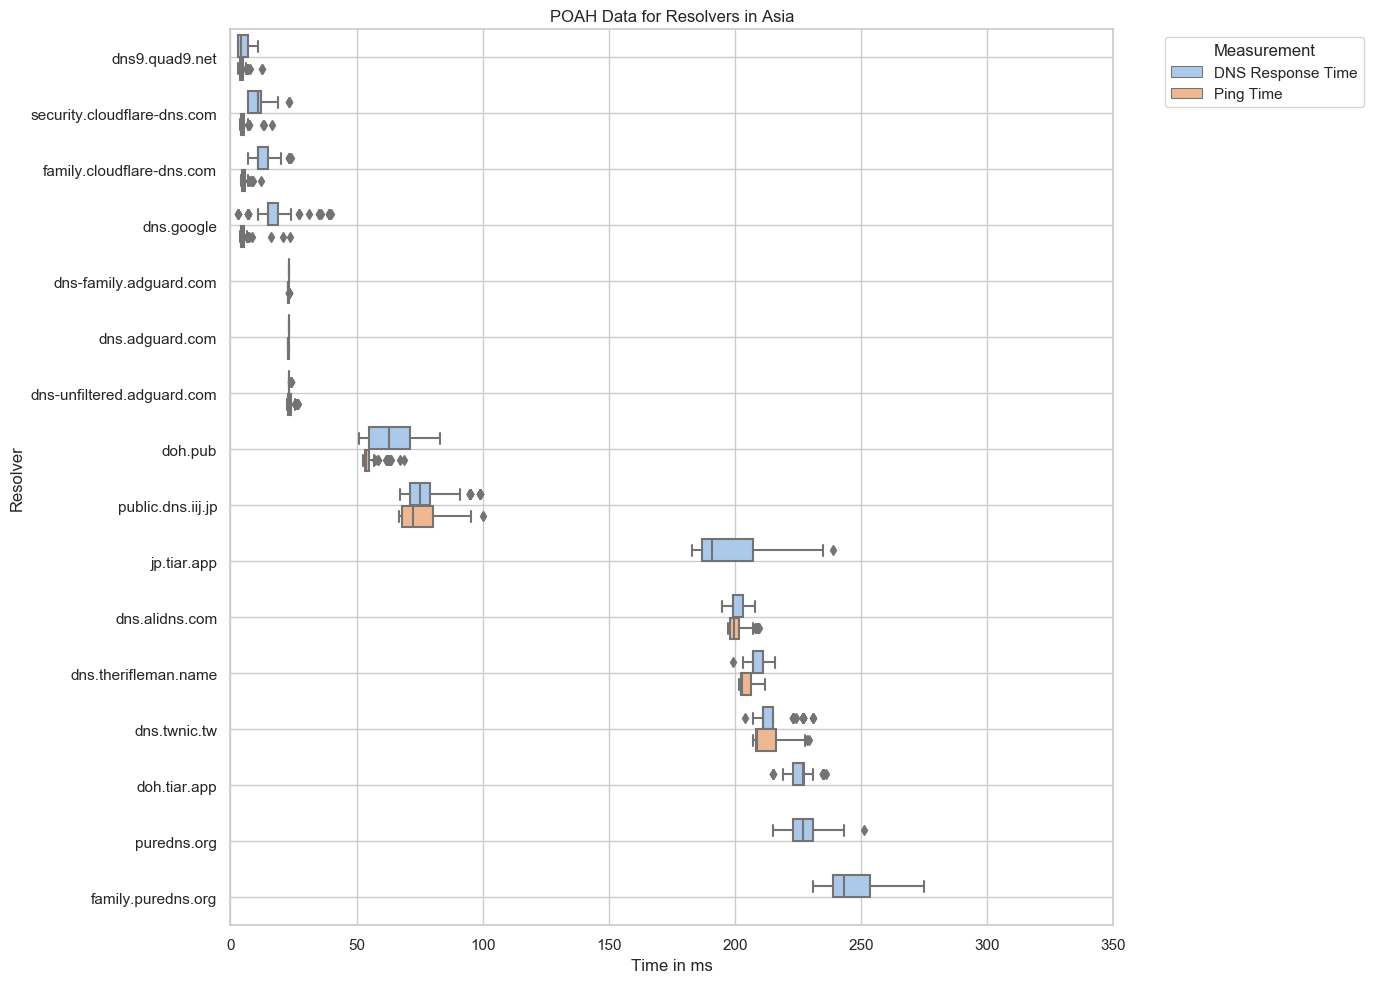

In [51]:
import numpy as np

# Calculate the IQR for each group
Q1 = df_filtered.groupby('resolver')['value'].quantile(0.25)
Q3 = df_filtered.groupby('resolver')['value'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for each group
upper_bound = Q3 + 2.5 * IQR
lower_bound = Q1 - 2.5 * IQR

# Filter data
def filter_outliers(row):
    resolver = row['resolver']
    return lower_bound[resolver] <= row['value'] <= upper_bound[resolver]

df_filtered = df_filtered[df_filtered.apply(filter_outliers, axis=1)]


sns.set(style="whitegrid")  # Set the style for the plots

plt.figure(figsize=(14, 10), dpi=100)  # Increase the figure size and DPI for better resolution

# Create the boxplot, applying the sorted order of resolvers
ax = sns.boxplot(
    data=df_filtered,
    x='value',
    y='resolver',
    hue='Has_Latency',
    order=sorted_resolvers,  # Apply the sorted order here
    palette="pastel",
    dodge=True
)
plt.setp(ax.get_yticklabels(), rotation=0)
ax.set_xlim(0, 350)  # Adjust the range according to your data
ax.yaxis.grid(True)

palette = "pastel"


# Set axis labels and title
ax.set_xlabel('Time in ms')
ax.set_ylabel('Resolver')
ax.set_title('POAH Data for Resolvers in Asia')

# Rotate Y-axis labels for better readability if necessary
plt.setp(ax.get_yticklabels(), rotation=0)

# Place the legend outside the plot
# Retrieve the handles and labels from the existing legend
handles, labels = ax.get_legend_handles_labels()

# Define custom labels
custom_labels = ['DNS Response Time', 'Ping Time']

# Create a new legend with custom labels
ax.legend(handles=handles, title='Measurement', labels=custom_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust the layout

# Save the plot with a higher resolution
##plt.savefig('/mnt/data/sorted_boxplot.png', format='png', dpi=300)

plt.show()  # Show the plot
